In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7, 3.5]

Euler and Runge-Kutta methods for solving ODEs

The Euler method is a first-order numerical method for solving ODEs. It uses a forward difference approximation to estimate the derivative of the solution at each time step and updates the solution accordingly. The basic formula for Euler's method is,
\begin{equation}
 y_{n+1} = y_n + h \cdot f(t_n, y_n)
\end{equation}
where, $y_n$ is the approximate solution at time $t_n$, $h$ is the time step and $f(t_n, y_n)$ is the derivative of the solution at time $t_n$.

Euler method has a first-order global truncation error ($O(h)$), which means that the error in the approximation is proportional to the time step. It is simple to implement but may not be accurate for stiff ODEs which are ODEs with rapidly changing or oscillatory solutions.

Runge-Kutta methods are a family of numerical methods for solving ODEs. These methods work by approximating the solution of an ODE at discrete time steps, also known as time discretization. The most commonly used Runge-Kutta method is the fourth-order Runge-Kutta (RK4).

The RK4 method uses a weighted average of four derivative evaluations to estimate the derivative of the solution at each time step. The basic formula for RK4 is,

\begin{equation}
y_{n+1} = y_n + \frac{h}{6} \left( k_1 + 2k_2 + 2k_3 + k_4 \right),
\end{equation}

where $y_n$ is the approximate solution at time $t_n$, $h$ is the time step, and $k_1, k_2, k_3, k_4$ are the weighted derivatives of the solution at time $t_n$. The weighted derivatives are calculated as follows,

\begin{equation}
    k_1 = f(t_n, y_n), \notag \\
    k_2 = f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2} \cdot k_1 \right), \notag \\
    k_3 = f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2} \cdot k_2 \right), \notag \\
    k_4 = f\left(t_n + h, y_n + h \cdot k_3 \right).
\end{equation}

RK4 has a fourth-order global truncation error ($O(h^4)$), so it is more accurate than Euler's method. It is also important to note that RK4 is more robust to stiff ODEs than Euler's method.

The following code compares the accuracy of Euler method and RK4 for solving the following first-order ODE,
\begin{equation}
\frac{dx}{dt} = -x
\end{equation}

where $x(0) = 1$.

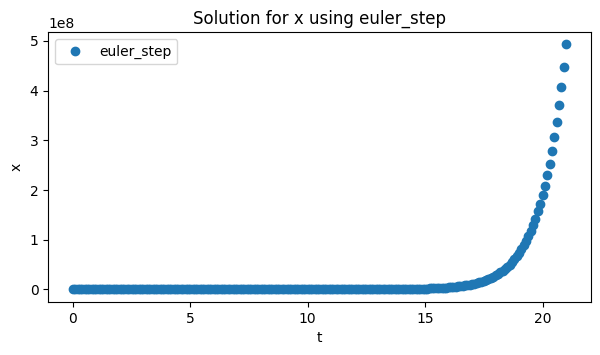

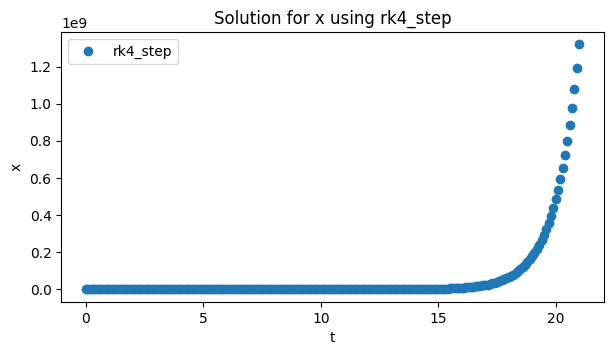

In [2]:
from ODEsolve import solve_euler_rk4, euler_step, rk4_step

# Define the function
f = lambda t, x: x # x' = x ODE
deltat_max = 0.1 # Step size
x0 = np.array([1]) # Initial condition
t0 = 0 # Initial time

solve_euler_rk4(f, x0, t0, deltat_max, euler_step)
solve_euler_rk4(f, x0, t0, deltat_max, rk4_step)

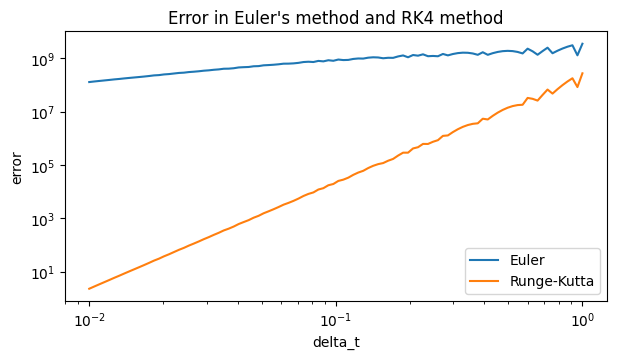

In [3]:
from ODEsolve import compare_euler_rk4_error

# Define the parameters for the first-order ODE
x0 = 1 # Initial condition
t0 = 0 # Initial time
delta_t_values = np.logspace(-2, 0, 100) # Step sizes
f = lambda t, x: x # x' = x ODE
# Compare the error in Euler's method and Runge-Kutta's method for different step sizes
compare_euler_rk4_error(f, x0, t0, delta_t_values)


The plot above shows that RK4 is more accurate than Euler's method for different time steps. Because it is a fourth-order method, it uses higher-order polynomial approximations to estimate the slope of the solution curve at each time step. On the other hand, RK4 is more computationally expensive than Euler's method because it requires four derivative evaluations at each time step.
 
The following code implements Euler's method and RK4 for solving the following second-order ODE,
\begin{equation}
\frac{d^2 u}{dt^2} = -u
\end{equation}

where $u = (x,y)$, $x(0) = 1$ and $y(0) = 1$.

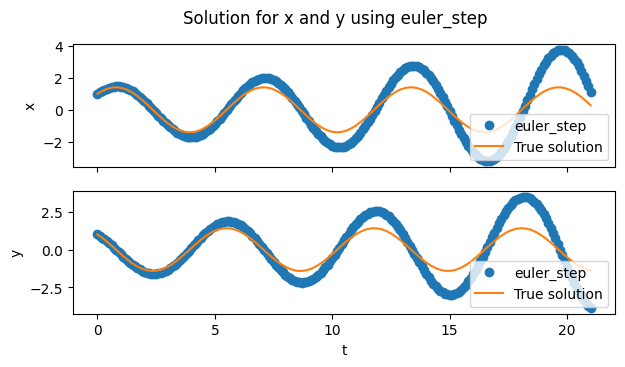

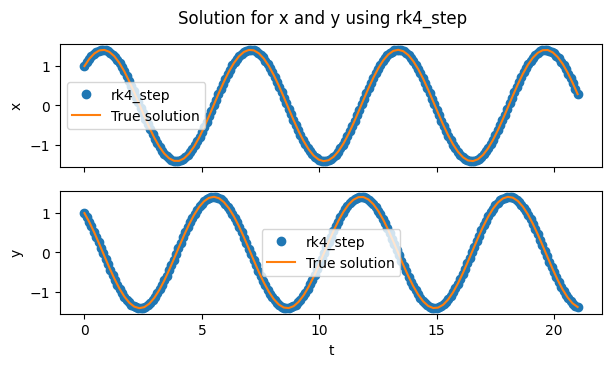

In [4]:
from ODEsolve import solve_euler_rk4
# Define the 2nd order ODE x'' = -x
def f(t,u):
    x = u[0]
    y = u[1]
    dydt = -x
    dxdt = y
    return np.array([dxdt, dydt])

# Define the true solution for the 2nd order ODE x'' = -x
def true_sol(t):
    x = np.sin(t) + np.cos(t)
    y = np.cos(t) - np.sin(t)
    return np.array([x, y])

x0 = np.array([1, 1]) # Initial condition, x = 1, y = 1
deltat_max = 0.1 # Step size

# Solve for x and y using Euler's method and Runge-Kutta's method
solve_euler_rk4(f, x0, t0, deltat_max, euler_step, true_sol=true_sol)
solve_euler_rk4(f, x0, t0, deltat_max, rk4_step, true_sol=true_sol)


The plot above shows that, for a step size of $h = 0.1$, RK4 is very accurate while Euler's method is not. This is because of the aforementioned higher-order polynomial approximations used by RK4. If the step size was reduced, Euler's method would be more accurate.

Numerical Shooting Method

The numerical shooting method is a numerical method for solving boundary value problems (BVPs) for ODEs. BVPs are differential equations within a domain with defined constraints, called boundary conditions. Numerical shooting is particularly useful for solving BVPs where the boundary conditions are unknown or difficult to determine.

The shooting method can be summarized as follows:

1. A guess is made for the unknown initial conditions that would satisfy the boundary conditions. 
2. The IVP is solved using the guessed initial conditions and, the solution trajectory is obtained from the IVP.
3. The initial conditions are adjusted based on the solution trajectory.
4. Steps 2 and 3 are repeated until the initial conditions converge to the values that satisfy the boundary conditions.

The following code implements the shooting method to solve a specific BVP for the predator-prey model. The model is described by the following system of ODEs:

\begin{equation} 
    \frac{dx}{dt} = x \cdot (1 - x) - \frac{a \cdot x \cdot y}{d + x},
\end{equation}

\begin{equation}
    \frac{dy}{dt} = b \cdot y \cdot \left(1 - \frac{y}{x}\right),
\end{equation}

where x(t) represents the population of prey, y(t) represents the population of predators, and a, b, and d are parameters.


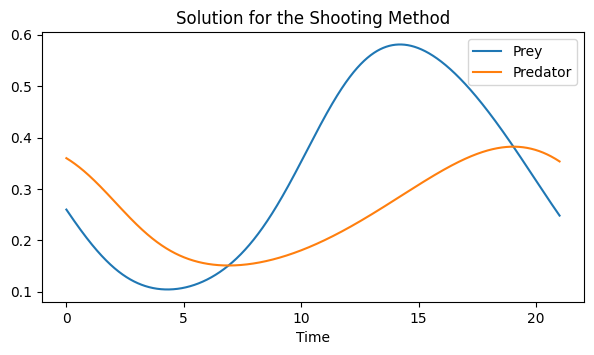

In [5]:
from Shooting_method import plot_solution
# Define the predator-prey ODE where b > 0.26
def ode(t, u):
    x = u[0] # Number of prey
    y = u[1] # Number of predators
    a = 1; d = 0.1; b = 0.2
    dxdt = x*(1-x) - (a*x*y)/(d + x)
    dydt = b*y*(1 - (y/x))
    return np.array([dxdt, dydt])

# Define parameters for the predator-prey ODE
deltat_max = 0.01
u0 = [0.26, 0.26]

plot_solution(ode, u0, deltat_max, rk4_step)

The code can be tested with different initial conditions and parameter values to study the behaviour of the predator-prey model. Such as the stability or the existence of multiple equilibria. The results can be compared with other numerical methods to validate the accuracy of the method. By plotting the phase portrait of the system when $b <  0.26$ we see there is a stable limit cycle because the prey and predator populations oscillate around the equilibrium point. When $b > 0.26$ the system has a stable equilibrium point because the populations converge to the equilibrium point.

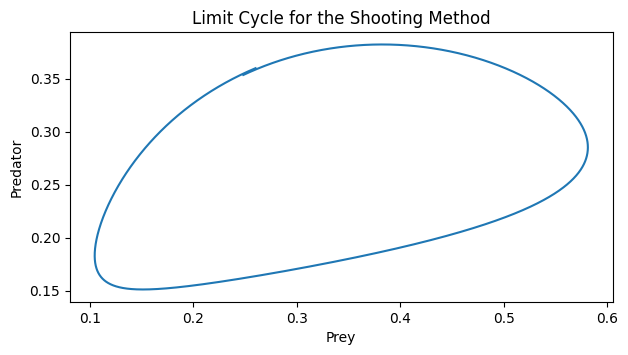

In [6]:
from Shooting_method import plot_limit_cycle
# Define initial guess
u0 = [0.26, 0.26]
plot_limit_cycle(ode, u0, deltat_max, rk4_step)

Numerical Continuation Method

The numerical continuation method is a method for approximating the solutions to a system of parameterized nonlinear equations. 

The system is in the form $F(\textbf{u}, \lambda) = 0$, where $\textbf{u}$ is the solution vector and $\lambda$ is a parameter. The method also requires an initial solution ($\textbf{u}_0, \lambda{_0}$). The method works by solving the system of equations for different values of $\lambda$ and then adjusting the parameter values until the solutions converge to the desired solutions.

Continuation methods are advantagious when studying bifurcation behaviors or stability as the parameter changes. Two common algorithms are natural parameter continuation and pseudo-arclength continuation.

Natural parameter continuation is the simplest continuation method. It works by updating the parameter value by a small step and then solving the system of equations again to obtain the solution at the updated parameter value. 

Psuedo-arclength continuation differs from natural parameter continuation in that it uses the tangent vector of the solution curve as the direction of the parameter update. It then calculates the step size using the following formula,

\begin{equation}
    \Delta s = \dot{u}_0^* (u - u_0) + \dot{\lambda}_0^* (\lambda - \lambda_0),
\end{equation}

where ($\dot{u}_0^*, \dot{\lambda}_0^*$) is the tangent vector at ($u_0, \lambda_0$).

Psuedo-arclength continuation is more complex and computationally expensive than natural parameter continuation, but it is more robust as it can handle situations where the tangent vector becomes small or vanishes, which can occur at bifurcation points.

Natural parameter continuation is more efficient than pseudo-arclength continuation because it does not require the computation of the Jacobian matrix. Though, it is less robust as it fails at turning points.

The following code implements natural parameter continuation and pseudo-arclength continuation to solve the following cubic equation,

\begin{equation}
    x^3 - x + c = 0,
\end{equation}

where $-2 \leq c \leq 2$.



Solver failed when c was in the range 0.38877755511022016 to 0.6853707414829655


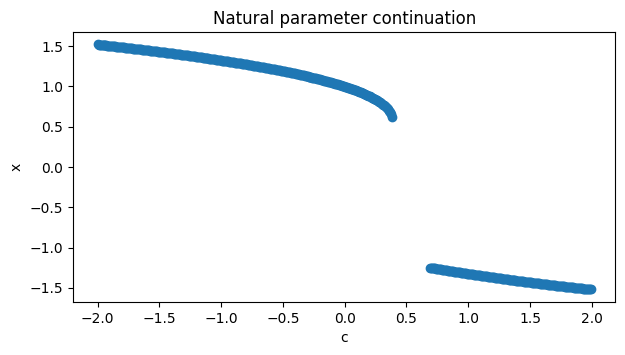

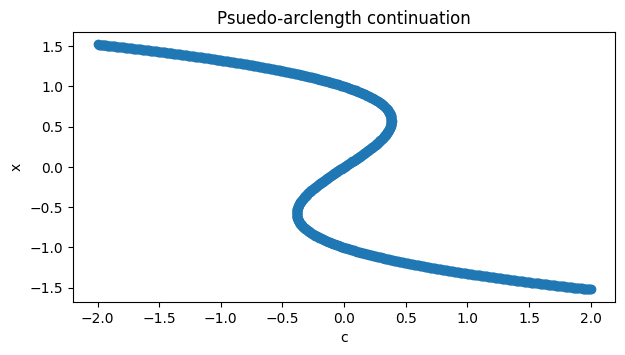

In [7]:
from Numerical_continuation import plot_continuation
# Define the initial guess and the parameter range
x0 = 1
c0 = -2
c1 = 2

# Define the function
def f(x, c):
    return x**3 - x + c

# Plot the continuation diagrams
plot_continuation(f, x0, c0, c1, 'natural')
plot_continuation(f, x0, c0, c1, 'arclength')

The plots display the advantage of using pseudo-arclength continuation over natural parameter continuation. The natural parameter continuation method fails at the turning points, while the pseudo-arclength continuation method does not.

Method of Lines

The method of lines (MOL) is a numerical method to approximate solutions to partial differential equations (PDEs) on a uniform discrete grid. It works by discretizing the spatial domain using finite differences. This then allows us to write the PDE as an initial value problem (IVP) or a boundary value problem (BVP) in ODEs, which can be solved using a numerical method.

There are three types of boundary conditions that can be applied to a BVP; Dirichlet, Neumann, and Robin. A Dirichlet boundary condition is where the boundary value is the solution. A Neumann boundary condition is where the derivative of the solution is the boundary value. A Robin boundary condition is a combination of Dirichlet and Neumann boundary conditions where the boundary value is the derivative of the solution plus a function.

To illustrate the use of finite differences with these boundary conditions, we can consider the BVP,
\begin{equation}
 \frac{d^2u}{dx^2} + q(x) = 0, u(a) = 0, u(b) = 0.
\end{equation}
We will set $q(x) = 1$, $a = 0$, and $b = 1$ for simplicity. By applying Dirichlet boundary conditions and obtaining different solutions we can see how the approximations differ from the exact solution $u_{\text{exact}} = \frac{1}{2} \cdot x \cdot (1 - x)$. For Neumann and Robin boundary conditions, the approximations are not similar to the exact solution but are similar to one another. This is because the Neumann and Robin boundary conditions impose constraints on the derivative of the solution at the boundary, rather than providing the values of the solution itself.

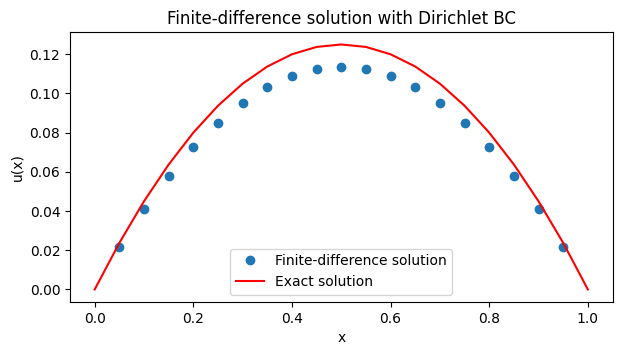

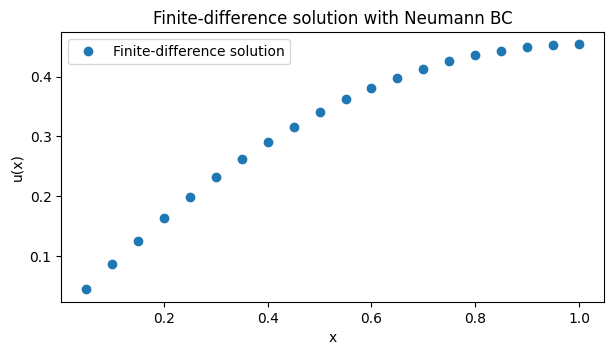

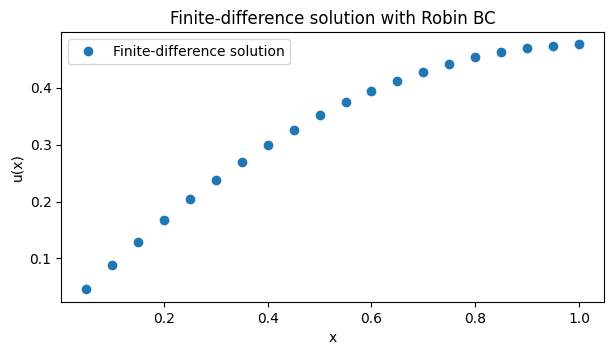

In [8]:
from BVPsolve import solve_bvp
N = 21; a = 0; b = 1
alpha = 0; beta = 0; gamma = 1; delta = 0
def q(x):
    return 1
solve_bvp(N, a, b, alpha, beta, q, "dirichlet")
solve_bvp(N, a, b, alpha, beta, q, "neumann", delta=delta)
solve_bvp(N, a, b, alpha, beta, q, "robin", gamma=gamma)

For each type of boundary condition, the numerical approximation has a significant truncation error when $N = 21$. By setting $N = 101$ the step size is much smaller therefore, the error is much smaller.

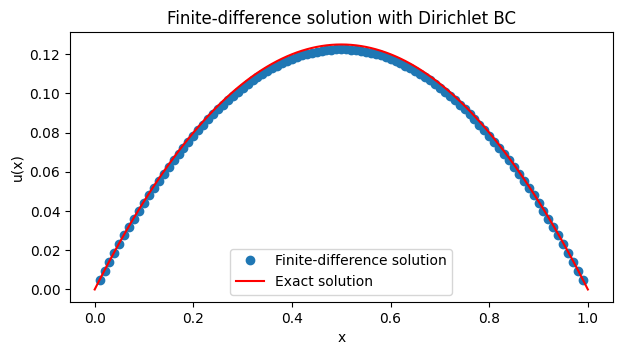

In [9]:
N = 101
solve_bvp(N, a, b, alpha, beta, q, "dirichlet")

The BVP solver also works when the source term $q(x)$ is a function of $x$. For example, we can evaluate the Bratu equation with $q(x) = e^{0.1x}$.

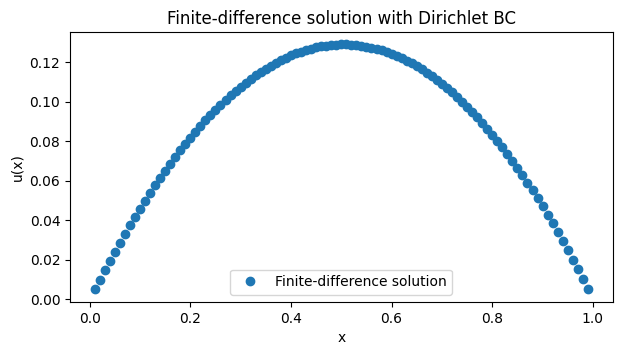

In [10]:
def q(x):
    return np.exp(0.1*x)
solve_bvp(N, a, b, alpha, beta, q, "dirichlet")

Explicit Euler, Implicit Euler, and Crank-Nicolson Methods for PDEs using Method of Lines

PDEs can be converted to a system of ODEs using the method of lines and can therefore be solved using numerical methods for ODEs. 

The explicit Euler method, as mentioned earlier, is a first-order method that approximates the derivative in time using a forward difference. But because a system of ODEs is being solved, the central difference approximation is also used to evaluate the second derivative in space. The basic formula for the explicit Euler method therefore becomes,

\begin{equation}
u_{x,t+1} = u_{x,t} + \frac{D\Delta t}{(\Delta x)^2}* \left( u_{x+1,t} - 2u_{x,t} + u_{x-1,t} \right),
\end{equation}

where $u_{x,t}$ is the approximate solution at time $t$ and space $x$, $\Delta t$ is the time step, $\Delta x$ is the space step, and $D$ is the diffusion coefficient.

This is the simplest method for solving a system of ODEs but it has some drawbacks. The method is first-order accurate in time and second-order accurate in space making it the least accurate of the three methods.  It is also unstable if,

\begin{equation}
\frac{D\Delta t}{(\Delta x)^2} > \frac{1}{2},
\end{equation}

which can be restrictive for small values of $\Delta x$. The explicit Euler method is also unsuitable for solving stiff ODEs because it is a first-order method. 

The implicit Euler method is a first-order method that approximates the derivative in time using a backward difference instead. This means that the method is unconditionally stable. However, it is computationally more expensive than the explicit Euler method when computing the next time step. Like explicit Eluer, the implicit Euler method is a first-order method, it is not suitable for solving stiff ODEs either. Also like explicit Euler, the implicit Euler method is first-order accurate in time and second-order accurate in space so it is still not very accurate. 

The Crank-Nicolson method is a second-order method that approximates the derivative in time using a central difference. It uses a central difference approximation for both the first and second derivatives. This means that the method is unconditionally stable and is suitable for solving stiff ODEs. It is also more accurate than the other two methods too because it is second-order accurate in time and space. 

To illustrate the use of each method, we can consider the second-order PDE,

\begin{equation}
\frac{du}{dt} = D\frac{d^2u}{dx^2} + q(x)
\end{equation}

where $D$ is the diffusion coefficient and $q(x)$ is the source term. We will set $D = 1$ for simplicity. The initial condition is $u(x,0) = 0$ and the boundary conditions are $u(0,t) = 0$ and $u(1,t) = 0$. The code uses the same boundary types as the previous section. The first set of plots show the solutions for $q(x) = 1$, the second set of plots show the solutions for $q(x) = e^{0.1x}$ and the third set of plots show the solutions for $q(x,u) = (1-u) \cdot e^{-x}$.

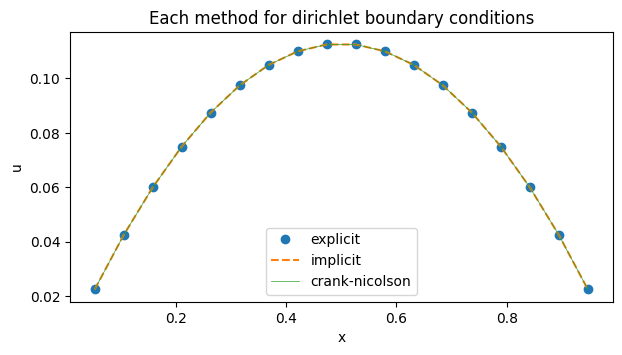

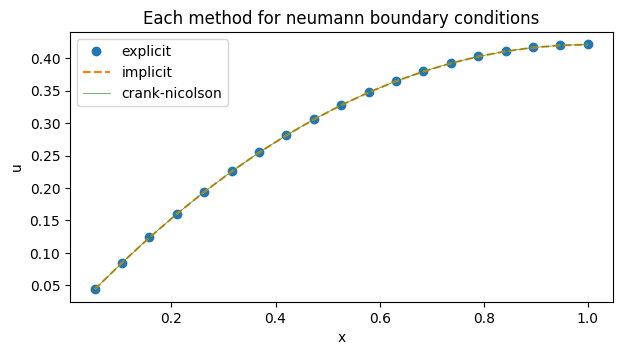

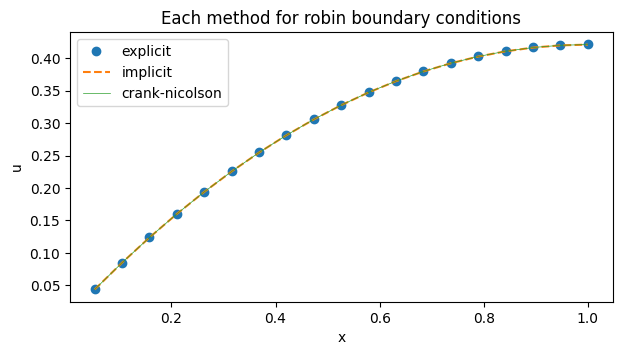

In [12]:
from PDEsolve import plot_method_forall_bctypes

# define the initial condition
def u0(x, t):
    return 0.0

def q(x, t, u, mu):
    return 1.0

# define the source term for the 

# Define the parameters for the PDE
N = 20; a = 0.0; b = 1.0; D = 1; u0 = u0; t_max = 1.0; dt = 0.001
plot_method_forall_bctypes(N, a, b, D, u0, t_max, dt, q, "dirichlet")
plot_method_forall_bctypes(N, a, b, D, u0, t_max, dt, q, "neumann")
plot_method_forall_bctypes(N, a, b, D, u0, t_max, dt, q, "robin")

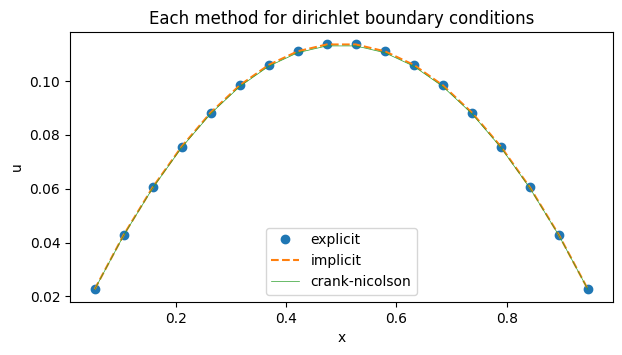

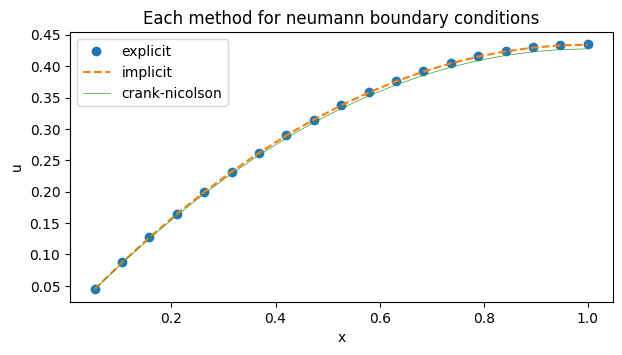

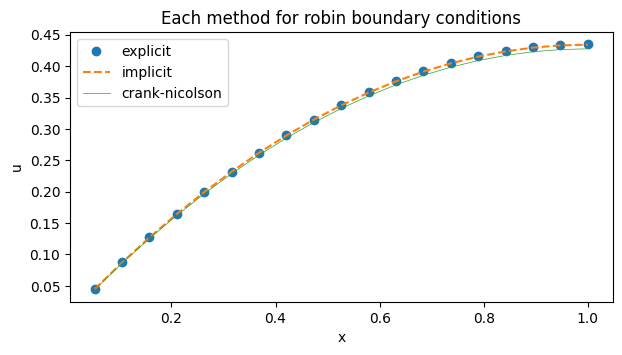

In [13]:
def q(x, t, u, mu):
    return np.exp(0.1*u)

plot_method_forall_bctypes(N, a, b, D, u0, t_max, dt, q, "dirichlet")
plot_method_forall_bctypes(N, a, b, D, u0, t_max, dt, q, "neumann")
plot_method_forall_bctypes(N, a, b, D, u0, t_max, dt, q, "robin")

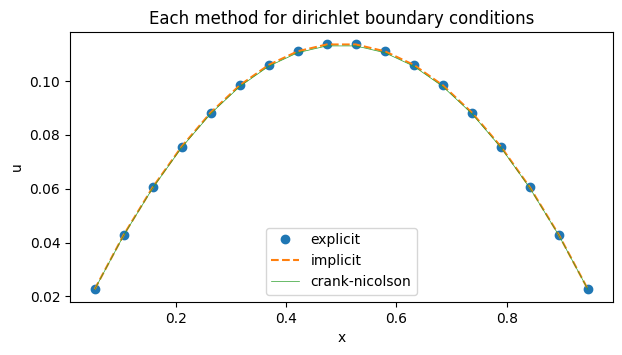

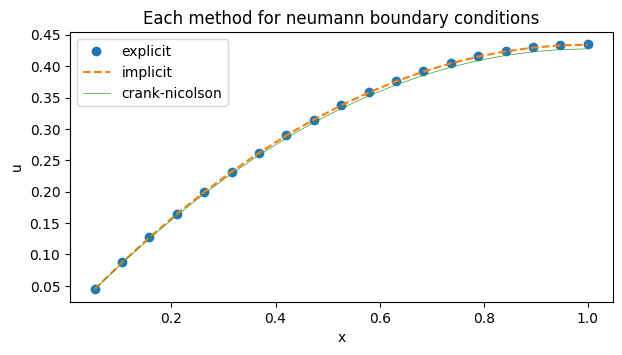

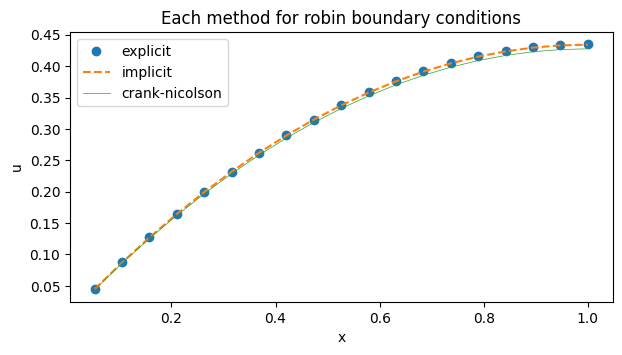

In [14]:
def q(x, t, u, mu):
    return np.exp(0.1*u)

plot_method_forall_bctypes(N, a, b, D, u0, t_max, dt, q, "dirichlet")
plot_method_forall_bctypes(N, a, b, D, u0, t_max, dt, q, "neumann")
plot_method_forall_bctypes(N, a, b, D, u0, t_max, dt, q, "robin")

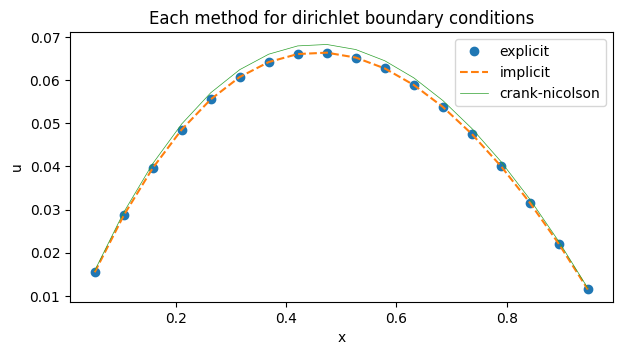

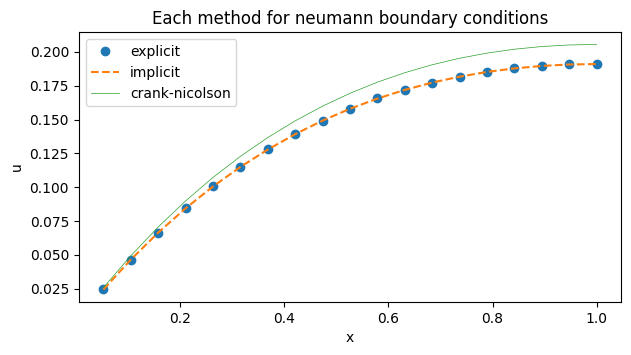

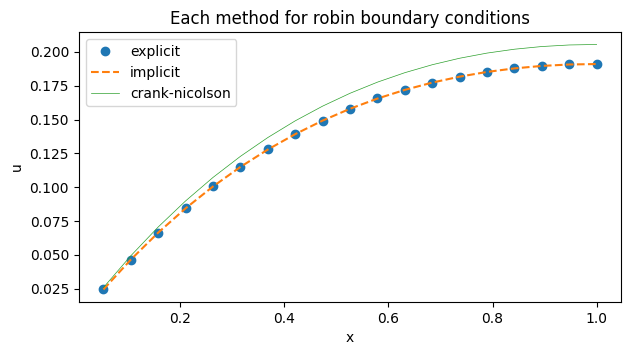

In [15]:
def q(x, t, u, mu):
    return (1-u)*np.exp(-x)

plot_method_forall_bctypes(N, a, b, D, u0, t_max, dt, q, "dirichlet")
plot_method_forall_bctypes(N, a, b, D, u0, t_max, dt, q, "neumann")
plot_method_forall_bctypes(N, a, b, D, u0, t_max, dt, q, "robin")

The plots show that the Crank-Nicolson method is more accurate than the other two methods. 